# Рубежный контроль №1

## Билалов Азат РТ5-61Б
## Вариант 2

### Задача

Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.
Для пары произвольных колонок данных построить график "Jointplot".

### Датасет

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

In [16]:
import pandas as pd
from sklearn.datasets import load_wine
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [17]:
wine_data = load_wine()
data = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

In [18]:
data['target'] = wine_data.target

In [19]:
# искусственно добавим пропуски случайным образом
for column in data.columns:
    data.loc[data.sample(frac=0.01).index, column] = None

In [20]:
# Количество пропусков в каждом признаке
missing_values = data.isnull().sum()
missing_values

alcohol                         2
malic_acid                      2
ash                             2
alcalinity_of_ash               2
magnesium                       2
total_phenols                   2
flavanoids                      2
nonflavanoid_phenols            2
proanthocyanins                 2
color_intensity                 2
hue                             2
od280/od315_of_diluted_wines    2
proline                         2
target                          2
dtype: int64

In [21]:
# Удаление строк с пропусками
data_drop = data.dropna()
data_drop.shape, data.shape

((153, 14), (178, 14))

In [22]:
# Корр. матрица
correlation_matrix = data_drop.corr()

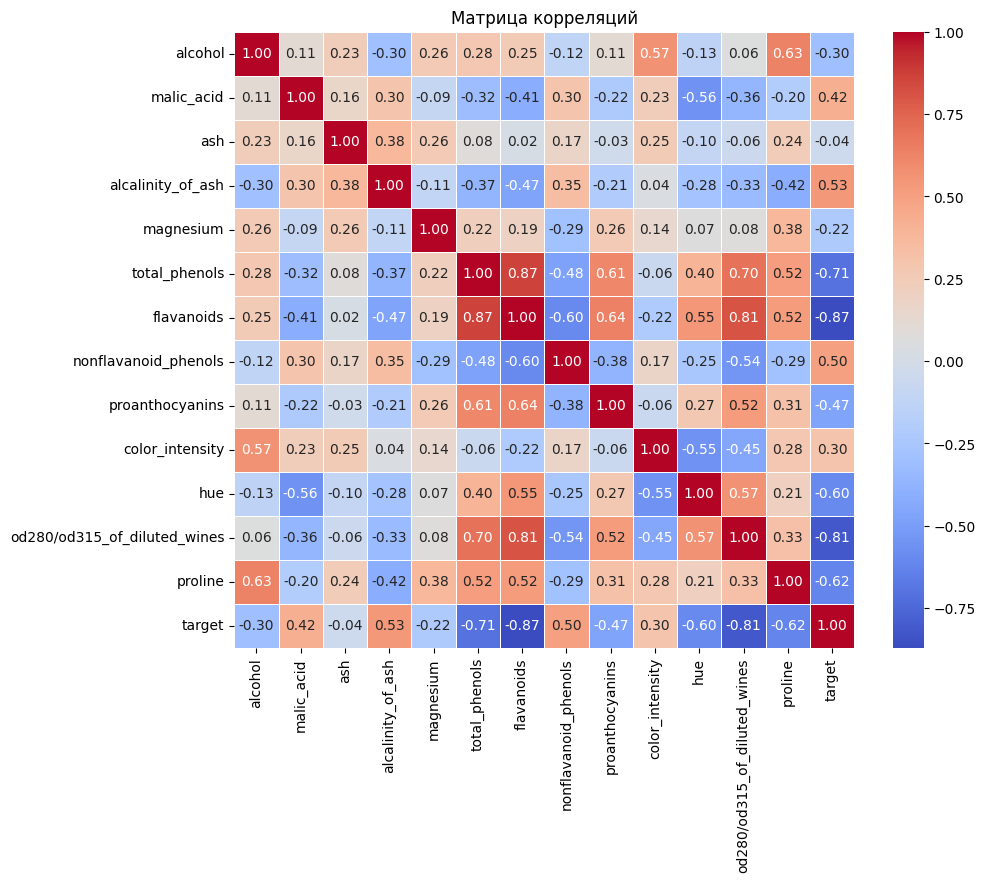

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Матрица корреляций')
plt.show()

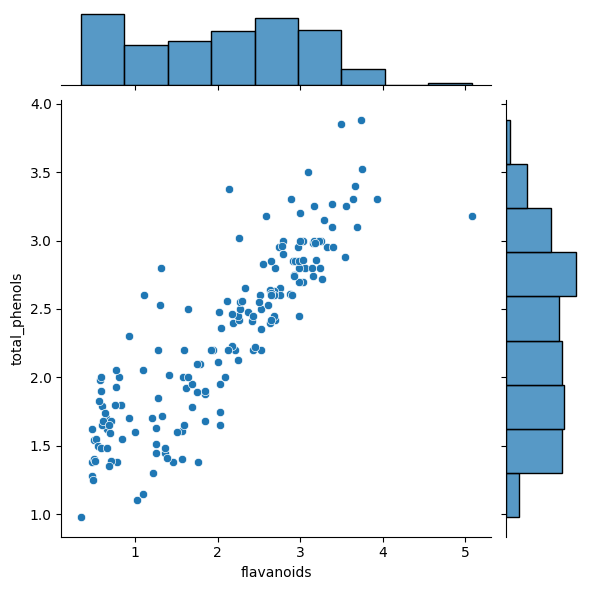

In [24]:
column1 = 'flavanoids'
column2 = 'total_phenols'

# Построим график "Jointplot"
sns.jointplot(x=column1, y=column2, data=data, kind='scatter')
plt.show()

## Выводы

На основе полученных данных можно сказать, что модель машинного обучения можно построить, так как данные не содержат пропусков и все признаки числовые. Признаки вносят разный вклад в модель, так как некоторые из них имеют высокую корреляцию с целевой переменной (например, `total_phenols`), а некоторые - низкую (например, `ash`). Есть также признаки, которые имеют высокую корреляцию между собой (например, `flavanoids` и `total_phenols`), что может привести к мультиколлинеарности.